Problem 1: Maximum Likelihood Estimation (MLE)

(a)
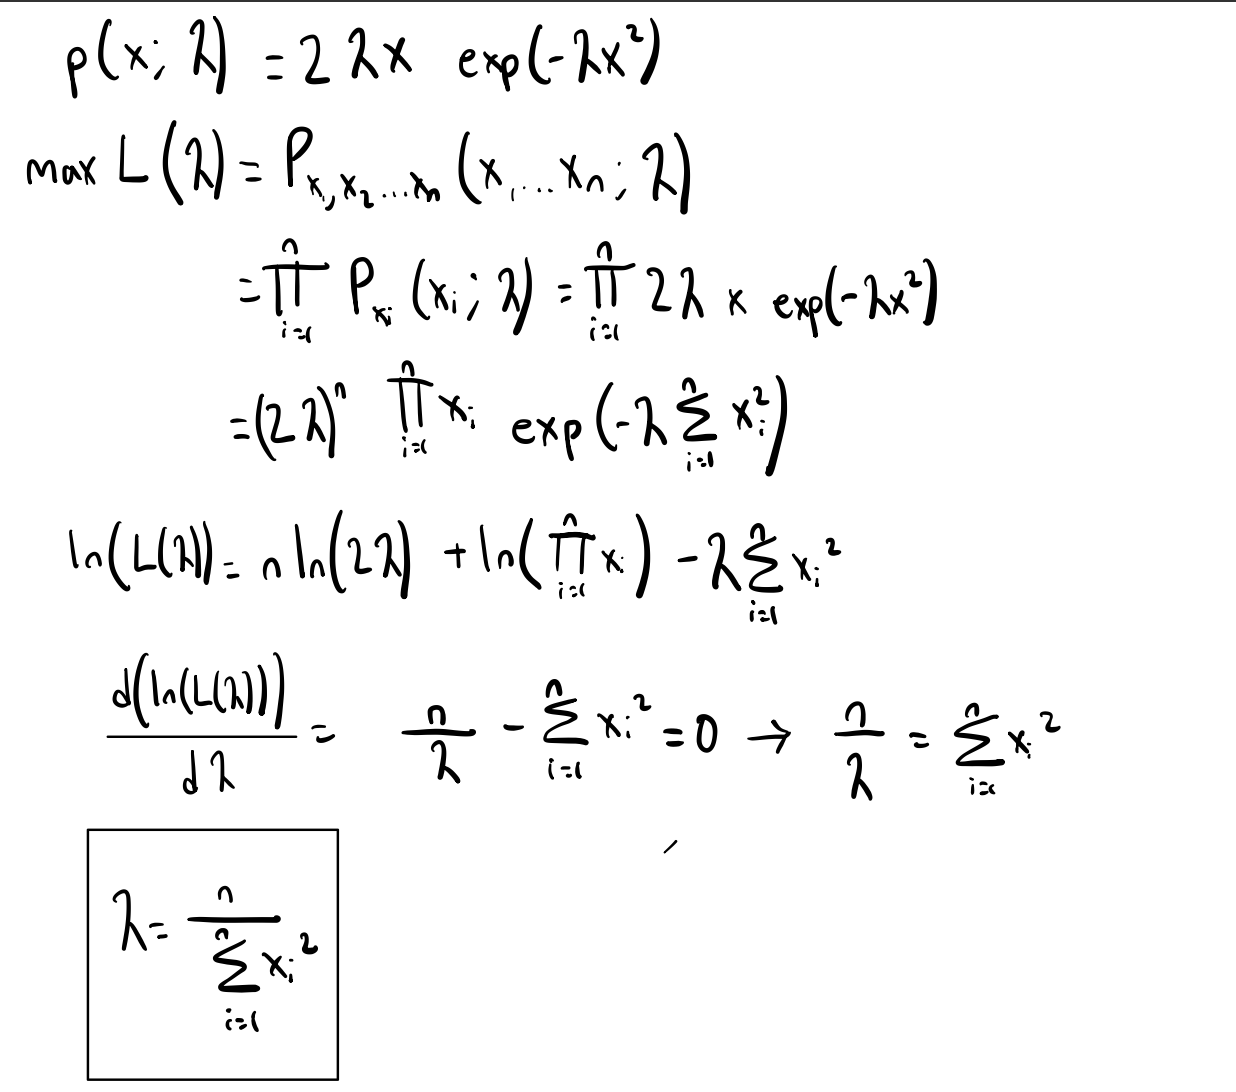

(b)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from scipy.special import comb
import math

traffic_data = pd.read_csv("Data-ps2/traffic.csv", header = None) # reading file 

print(traffic_data)
traffic_values = traffic_data[0]

def traffic_MLE():
    n = 0 #number of values n 
    sum = 0 #summation
    for x in range(len(traffic_values)):
        sum+=traffic_values[x]**2
        n+=1
    return n/sum
print(traffic_MLE())


/var/folders/g2/yg90mgl51n72b48kftzsy87m0000gn/T/ipykernel_22827/2569010211.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


             0
0     0.565706
1     1.030801
2     0.719174
3     0.970237
4     0.940219
...        ...
9995  0.520613
9996  0.761953
9997  1.112560
9998  0.065503
9999  0.627667

[10000 rows x 1 columns]
1.1657225806056326


In [2]:
def MLE_function(x):
    lam = traffic_MLE()
    return (2*lam *x * np.exp(-1*lam * (x**2)))

Text(0.5, 1.0, 'Traffic Values Histogram')

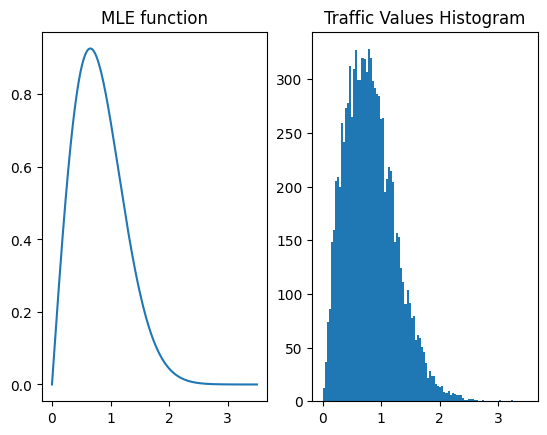

In [3]:
def MLE_function(x):
    return (2*traffic_MLE() *x * np.exp(-1*traffic_MLE() * (x**2)))


x = np.linspace(0, 3.5, 10000)

fig, ax = plt.subplots(1,2)
ax[0].plot(x,MLE_function(x))
ax[1].hist(traffic_values,range = (0,3.5), bins = 100)

plt.subplot(1,2,1)
plt.title("MLE function")
plt.subplot(1,2,2)
plt.title("Traffic Values Histogram")



Findings- The MLE function does a  job of plotting an accurate distribution of the traffic data points because the shape of the graphs is roughly similar, however the traffic values has more noise because it comes from real values.

Problem 2: Hypothesis Testing

(a)

In [4]:
cardiac_df = pd.read_csv("Data-ps2/cardiac.csv")


cardiac_contingency = pd.crosstab(cardiac_df['gender'],  
                            cardiac_df['hxofHT'], 
                                margins = False)
cardiac_contingency.index = ["Male", "Female"]
cardiac_contingency.columns = ["Hypertension", "Healthy"]

#values of each cell
a = cardiac_contingency.loc["Male", "Hypertension"]
b = cardiac_contingency.loc["Male", "Healthy"]
c = cardiac_contingency.loc["Female", "Hypertension"]
d = cardiac_contingency.loc["Female", "Healthy"]
upperN = a + b + c + d #grand total


print(cardiac_contingency)

        Hypertension  Healthy
Male             144       76
Female           249       89


(b)

In [5]:
upperK = a+c
lowerK = a
lowerN = a+b

def fisher_test(x,y,z):
    hypertension_cmale = comb(x,y)
    hypertension_cmale = np.array(hypertension_cmale, dtype = np.float64)
    healthy_cmale =  comb(upperN-upperK, lowerN-lowerK)
    total_cmale =  comb(upperN, lowerN)

    return (hypertension_cmale*healthy_cmale)/total_cmale


print("The probability of this exact table is", fisher_test(a+c,a,a+b))

The probability of this exact table is 0.008846092806851051


(c) Null Hypothesis - There is no difference in the frequency of hypertension between Males & Females

(d)

In [6]:
def calculate_p(x,y,z):
    if y<0:
        return 0 
    return fisher_test(x,y,z)+ calculate_p(x,y-1,z)
    

#fisher_test(upperK,lowerK,lowerN)
print("The p-value is:",calculate_p(upperK,lowerK,lowerN))


The p-value is: 0.02048010189862076


Because b <= 0.05, is is statisticlaly significiant and we can reject the null hypthesis and accept the alternative hypothesis which means that there is a significant difference in the frequency of hypertension in Males & Females

Problem 3: K-means

In [7]:
kmeans_df = pd.read_csv("Data-ps2/2D_data.txt" , header = None, delimiter=r"\s+")
kmeans_df = pd.DataFrame(kmeans_df)
kmeans_df.columns = ['X', 'Y']

Text(0.5, 1.0, 'Unclustered Data')

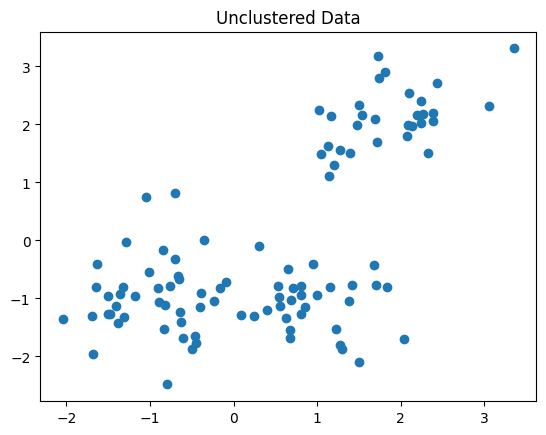

In [8]:
# prompts to enter a k-value to generate k-clusters
x_values = kmeans_df['X'] 
y_values = kmeans_df['Y']

plt.scatter(x_values, y_values)
plt.title("Unclustered Data")

In [9]:
##I used the kmeans outline and backbone from the Stanford CS221 website linked here:https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
##In addition I had to search up a lot of documentatino for numpy and plotting
def kmeans(data,k):
    centroids = get_random_centroids(data,k)
    
    iterations = 0
    old_centroids = None 

    while not should_stop(old_centroids, centroids):# runs when should_stop is fals
        iterations += 1
        old_centroids = centroids
        labels = get_labels(data,centroids)
        centroids = new_centroids(data,labels, k)
        
    global distance_scores
    distance_scores = calculate_distance_score(data,labels, centroids)
    return centroids, labels


def get_random_centroids(data,k):
    return data.sample(n=k).values

#checks for convergence
def should_stop(old_centroids, centroids):
    if old_centroids is None:
        return False
    return np.allclose(old_centroids, centroids) # checks equlity of the 2 np arrays


#euclidian distance
def get_distance(data_point, centroid_point):
    return np.sqrt(np.sum((data_point - centroid_point) ** 2))

#assigns each datatpoint to a label of the nearest centroids
def get_labels(data,centroids):
    labels = []
    for index, row in data.iterrows():
        distance = [get_distance(row.values, centroid) for centroid in centroids]
        labels.append(np.argmin(distance))
    return labels

#create new centroids based on the designated lables 
def new_centroids(data,labels, k):
    df = data.copy()
    df['labels'] = labels
    centroids = np.array([df[df['labels'] == i].mean(axis=0)[:-1] for i in range(k)])
    return centroids

#calculate the distance score
def calculate_distance_score(data,labels, centroids):
    df = data.copy()
    df['labels'] = labels
    total_distance = 0 
    for index, row in df.iterrows():
        centroid_point = centroids[int(row['labels'])]  # Corrected indexing
        total_distance += get_distance(row[:-1].values, centroid_point)
    return total_distance



def plot_clusters(data,k):
    centroids,labels = kmeans(data,k)
    plt.scatter(data['X'], data['Y'], c=labels, cmap='coolwarm')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s = 150)
    plt.title(f"K-means where # of Clusters is={k}")
    plt.show()



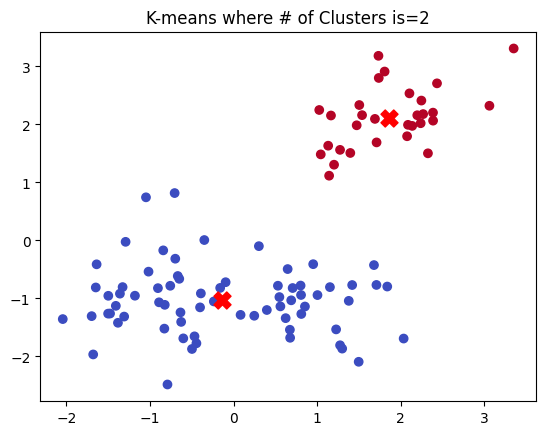

In [10]:
# kmeans where k = 2
plot_clusters(kmeans_df,2)
#red X represent the centroids after convergence

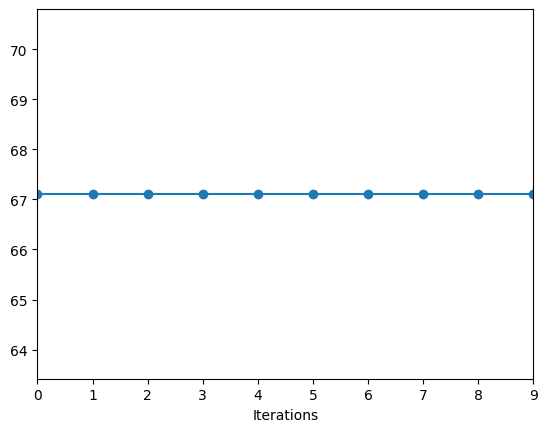

In [11]:
def plot_distance_scores(scores,x_max):
    plt.plot(scores, marker='o')
    plt.xlim(0, x_max)
    plt.xlabel("Iterations")
    plt.show()

d_score = []
for x in range(10):
    kmeans(kmeans_df,3)
    d_score.append(distance_scores)
plot_distance_scores(d_score,9)
    

Findings- Typically over every iteration, ther distance score remains roughly the same, but every know and then there are spikes in the graph indicating the kmeans algorithm did not run as efficiently as it should of, however, overall there is little variablity in the distance scores.

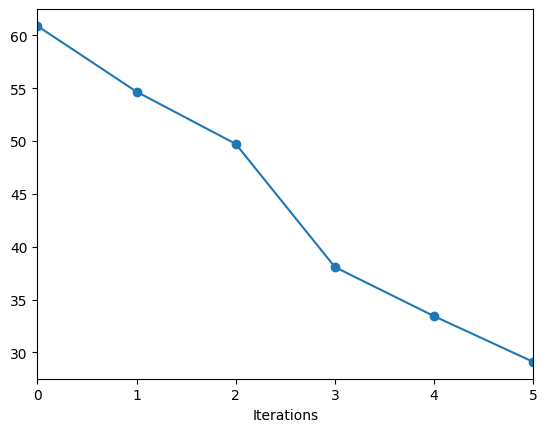

In [12]:
def plot_clustered_distance_scores(data):
    all_distance_scores = []
    kmeans(data,4)
    all_distance_scores.append(distance_scores)
    kmeans(data,6)
    all_distance_scores.append(distance_scores)
    kmeans(data,8)
    all_distance_scores.append(distance_scores)
    kmeans(data,10)
    all_distance_scores.append(distance_scores)
    kmeans(data,15)
    all_distance_scores.append(distance_scores)
    kmeans(data,20)
    all_distance_scores.append(distance_scores)

    plot_distance_scores(all_distance_scores,5)

plot_clustered_distance_scores(kmeans_df)

Findings- As the k value increased, the number of clusters increased which resulted in a decrease of distance score because more centorids mean that the datapoints in each cluster are closer tot their respective centroid, which intuitvely makes sense too.

Problem 4: Bonus Points

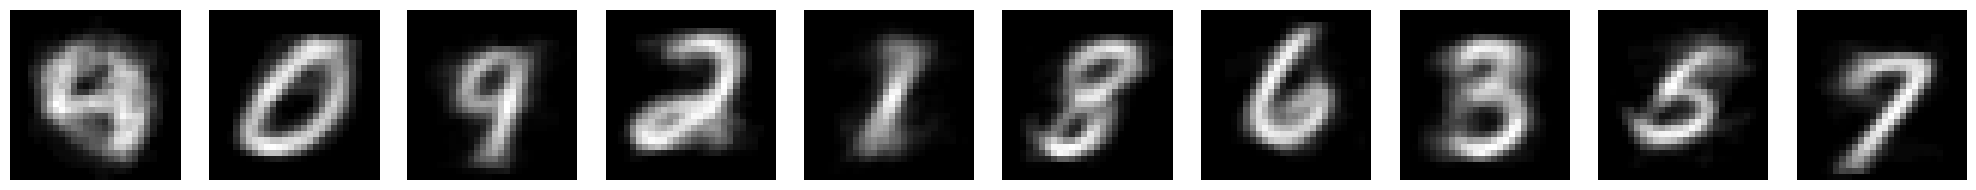

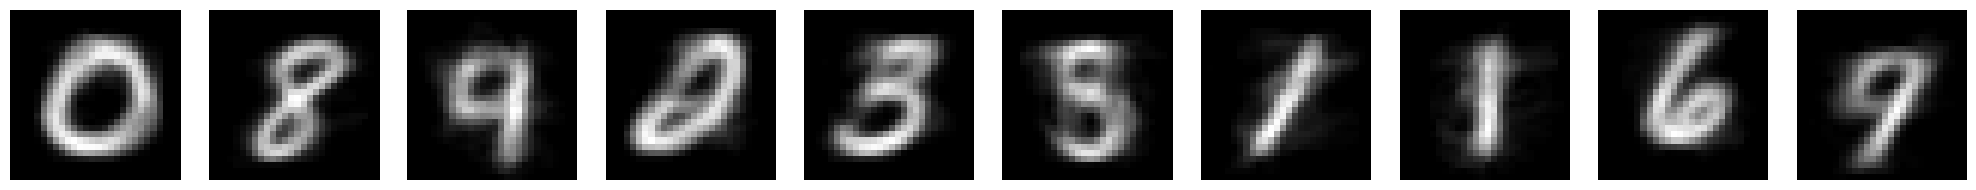

In [13]:
import pandas as pd

train_x = pd.read_csv("Data-ps2/mnist/trainX.txt", header=None, sep=',')
train_y = pd.read_csv("Data-ps2/mnist/trainY.txt", header=None, sep=',')
test_x = pd.read_csv("Data-ps2/mnist/testX.txt", header=None, sep=',')
test_y = pd.read_csv("Data-ps2/mnist/testY.txt", header=None, sep=',')



def handwritten_kmeans(data):
    centers, labels = kmeans(data,10) 
    plt.figure(figsize=(20,2))  
    for x in range(len(centers)):
        image = centers[x].reshape(28, 28)
        plt.subplot(1, 10, x + 1)  
        plt.imshow(image, cmap='gray')
        plt.axis('off')  
    plt.tight_layout()  
    plt.show()  
handwritten_kmeans(train_x)
handwritten_kmeans(test_x)# prints out the centers as images